# Propser Loan Data Analysis
by Christina Elele

## Preliminary Wrangling

This document seeks to explore a dataset containing peer-to-peer loan information of approximately 113,937 loans with 81 variables from Prosper Funding LLC.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

%config InlineBbackend.figure_format='retina'

Now, let's load in our data set and take a high prolfile view of our dataframe.


In [2]:
# load in dataset into a pandas dataframe
loan = pd.read_csv('prosper_loan_data.csv')

In [3]:
# high-level overview of data shape and composition
loan.shape

(113937, 81)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
#View random samples of the data frame
loan.sample(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
50940,475934706009926626B8F83,436646,2009-12-04 08:55:13.070000000,NaN,36,Completed,2011-10-18 00:00:00,0.09794,0.0945,0.0845,...,-67.17,0.00,0.00,0.00,0.0,1.0,0,0,0.0,335
58033,B8FD3382959174516882345,107923,2007-03-07 11:16:04.777000000,HR,36,Chargedoff,2007-12-14 00:00:00,0.27303,0.2577,0.2477,...,-11.40,0.00,3246.50,3246.51,0.0,1.0,1,0,0.0,44
17377,9D063562943642600E28AB5,674416,2012-11-20 04:54:39.463000000,NaN,36,Current,NaN,0.18725,0.1509,0.1409,...,-156.90,0.00,0.00,0.00,0.0,1.0,0,0,0.0,162
113792,E43C3548328183436FD70FD,592262,2012-05-23 15:08:31.490000000,NaN,36,Completed,2013-11-05 00:00:00,0.26681,0.2287,0.2187,...,-95.49,0.00,0.00,0.00,0.0,1.0,0,0,0.0,85
61761,F6E83494631702284246A81,474957,2010-09-09 14:47:57.680000000,NaN,36,Completed,2011-08-16 00:00:00,0.31053,0.2750,0.2650,...,-22.70,0.00,0.00,0.00,0.0,1.0,0,0,0.0,75
26200,B9F93548081241958EF1B6F,593361,2012-05-27 21:20:51.703000000,NaN,36,Completed,2013-04-17 00:00:00,0.21372,0.1768,0.1668,...,-26.86,0.00,0.00,0.00,0.0,1.0,0,0,0.0,104
78987,48203551491017537819D58,604933,2012-06-27 09:02:25.723000000,NaN,60,Chargedoff,2013-12-29 00:00:00,0.23318,0.2085,0.1985,...,-56.20,-128.36,6340.11,6340.11,0.0,1.0,0,0,0.0,15
23794,CB3335883744961375A2472,882632,2013-08-28 12:52:02.840000000,NaN,36,Current,NaN,0.25781,0.2199,0.2099,...,-18.94,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
49103,3D2A3558522190171CD77CC,641300,2012-09-18 13:53:06.453000000,NaN,36,Past Due (91-120 days),NaN,0.33665,0.2969,0.2869,...,-38.26,0.00,0.00,0.00,0.0,1.0,0,0,0.0,29
90892,EF2F3603491379528288BC4,1162681,2014-02-18 19:42:12.093000000,NaN,60,Current,NaN,0.24011,0.2150,0.2050,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1


## What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. There two major types of variables in the dataset, namely: Categorical, and Numeric variables.

The dataset variables can also be divided into two main categories:

- Borrower information
- Loan performance information

### What is/are the main feature(s) of interest in your dataset?

I am most interested in finding out the most important variables to consider when predicting a borrower's Annual Percentage Rate (APR) for a loan, and finding out how well the estimated loan performance matches the actual loan performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the following features will have the greatest effect on the performance of the loan:

1. Borrower APR
2. Original Loan amount
3. Income Range
4. Debt to income ratio
5. Credit Grade
6. Prosper Rating (Alpha)
7. Estimated return which is Estimated Effective Yield minus Estimated Loss Rate. This only applies to those loans that were taken after July 2009

Loan performance will be measured against Estimated Returns by calculating our Estimated Returns based on how Prosper calculates their Annualized Net Returns.

## Univariate Exploration
The dataset has 81 variables which will be too large for our exploaration. We'll need to subset our dataframe by so as to take out all variables that are not relevant to our explorations leaving only the relevant ones.

In [8]:
# Subsetting the dataframe by selecting our features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'LoanStatus', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
subset_loan = loan[cols]

In [9]:
# Removing loans with missing borrower APR information
subset_loan = subset_loan[~subset_loan.BorrowerAPR.isna()]

In [10]:
# Removing outliers i.e. loans with stated monthly income greater than 30,000
subset_loan = subset_loan[subset_loan.StatedMonthlyIncome<=30000]

In [11]:
# Converting ProsperRating into an ordered categorical type
rating_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
subset_loan['ProsperRating (Alpha)'] = subset_loan['ProsperRating (Alpha)'].astype(ordered_var)

In [12]:
#Converting Employment Status into an ordered categorical type

employ_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = employ_order)
subset_loan['EmploymentStatus'] = subset_loan['EmploymentStatus'].astype(ordered_var)
subset_loan.shape

(113585, 7)

We've successfully dropped 352 rows and 75 columns. This will make it easier for us to explore our variables of interest.

Next, we'll explore all our variables of interest starting with the Borrower APR

 **1. Borrower APR**

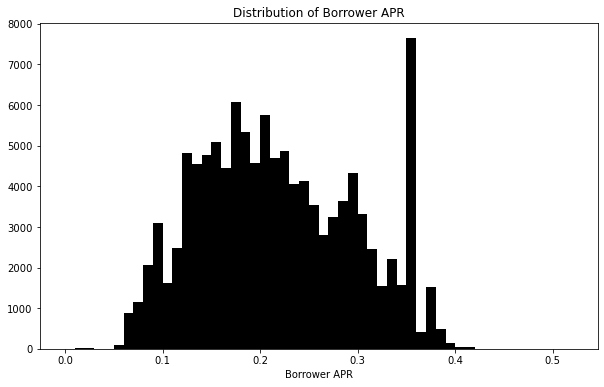

In [13]:
bins = np.arange(0, subset_loan.BorrowerAPR.max()+0.01, 0.01)
plt.figure(figsize=[10, 6])
plt.hist(data = subset_loan, x = 'BorrowerAPR', bins = bins, color = 'black');
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

From the above plot, we can say that the APR distribution seems to have multiple modes. It appears that most borrowers prefer to take loans at the 10%, 15%, 22%, 25%, and 30% annual interest rates. However, there are very few people who would take loans that have APRs greater than 40%.

**2. Original Loan Amount**

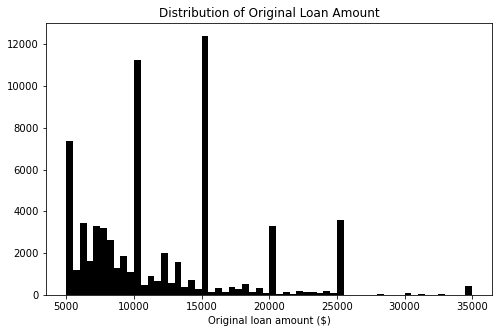

In [14]:
bins = np.arange(5000, subset_loan.LoanOriginalAmount.max()+500, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = subset_loan, x = 'LoanOriginalAmount', bins = bins, color = 'black');
plt.xlabel('Original loan amount ($)');
plt.title('Distribution of Original Loan Amount');

The most common loan amounts taken by borrowers looks to be around USD 5,000, USD 10,000, USD 15,000, USD 20,000, USD 20,000, and USD 25,000. But, there are several loans of other amounts between these figures. One common thing I observed amongst all these loan amounts is that they are all in the multiples of USD 1,000s.

**3. Estimated Return**

In [15]:
loan.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

It looks like we have quite a number of null values in this variable (Estimated Return) given that we have 84,853 rows out of the 113,585 that we had earlier. We'll be dropping the null values in the next step as we still have sufficient values in the variable to explore with.

From our description, we can see that estimated returns range from -18% to 28%. I assume that the estimated returns below 0 % should account for those borrowers who will be unable to repay the full amount of their loan original amount (plus interest).

A quick glance at the quartile distribution and we can expect a positive skewed Estimated Return distribution plot.

In [16]:
# Dropping the null rows without an estimated return
loan.EstimatedReturn.dropna(axis = 0, inplace = True)

Let's start by getting a closer look at our feature of intrests beginning with the estimated returns.

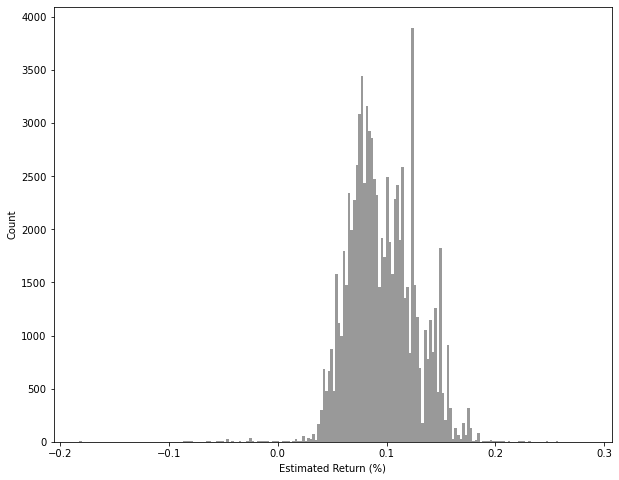

In [17]:
# histogram plot
plt.figure(figsize = [10,8])
sns.distplot(loan.EstimatedReturn, kde = False, bins = 200, color = 'black')
plt.xlabel('Estimated Return (%)')
plt.ylabel('Count');

From the above histogram plot, we can see that most loans on the Prosper Loan platform have their estimated returns fall between 0% and 20% which may be of interest to an investor. This is a positive skewed distribution. There are however those loans that fall below 0% rate indicating losses as these borrowers would be unable to meet their repayment obligations. An investor would have to weigh the number of loans yielding estimated returns between 0% and 20% against those whose estimate returns fall below this range to make an investment decision.


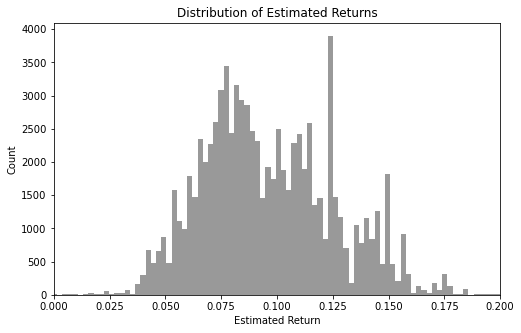

In [18]:
# zoom in on histogram
plt.figure(figsize = [8,5])
sns.distplot(loan.EstimatedReturn, kde = False, bins = 200, color = 'black')
plt.xlim(0, .2)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Distribution of Estimated Returns');

**4. Actual Returns**

Here, we would need to calculate the actual returns generated by the loans on the Prosper platform by using the remaining loan performance (LP) variables.

I took a look at [Prosper's FAQ](https://prosper.zendesk.com/hc/en-us/articles/360001288366-Frequently-Asked-Questions-about-Historical-Returns) and found that Historical Return for loans originated through Prosper were calculated as below:

a). the sum of the Interest Paid, plus Late Fees, minus Servicing Fees, minus Collection Fees, in each case on active loans, plus Net Recoveries on charged-off or defaulted loans, plus Net Debt Sale Proceeds on sold loans, minus Gross Principal Losses; divided by

b). the sum of the Principal Balances Outstanding on active loans at the end of each day since origination. 

The results are then annualized to get the “Historical Return” for the Group. Below is a pictorial view of the formula taken from  [Prosper's FAQ page](https://prosper.zendesk.com/hc/en-us/articles/360001288366-Frequently-Asked-Questions-about-Historical-Returns)

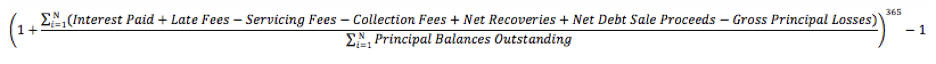

For the purpose of this investigation, we will be dividing by the original loan amount. This is because we may run into some categorical issues if we attempted to calculate the current rate of return for current loans against the rate of return for completed loans.

We will use the formular below to compute our Actual returns which will then be matched against our Estimated returns to draw conclusions for this section of our investigation.
$$
ActualReturns = 1 + \frac{CustomerPayments - OriginalLoanAmount - (ServiceFees + CollectionFess + NetPrincipalLosses)}{OriginalLoanAmount}
$$

In [19]:
# simplify the actual return formula
loan['ActualReturns'] = loan.LP_CustomerPayments - loan.LoanOriginalAmount - (loan.LP_ServiceFees + loan.LP_CollectionFees + loan.LP_NetPrincipalLoss)
loan['ActualReturns'] = 1 + (loan.ActualReturns / loan.LoanOriginalAmount)

In [20]:
loan.ActualReturns.describe()

count    113937.000000
mean          0.531620
std           0.621164
min          -1.000650
25%           0.074989
50%           0.415864
75%           1.119834
max           2.602880
Name: ActualReturns, dtype: float64

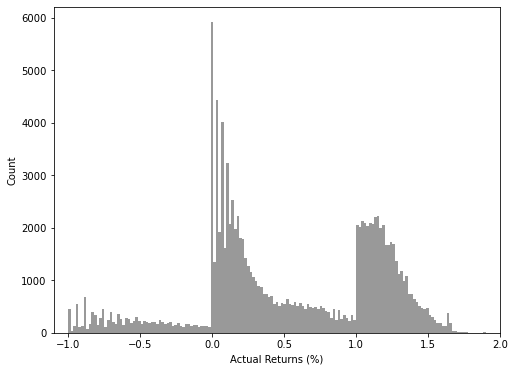

In [21]:
# plot distribution
plt.figure(figsize = [8,6])
sns.distplot(loan.ActualReturns, kde = False, bins = 200, color = 'black')
plt.xlim(-1.1, 2.0)
plt.xlabel('Actual Returns (%)')
plt.ylabel('Count');

The distribution shows that investors lost some investment from the loans they lent out because some borrowers were unable to pay back the original amount of loans that they took. These borrowers are those whose Actual returns fall between -1% and 0% on the above plot.

A large number of borrowers were able to repay only the original loan amount but not the interest. This means that investors in this set of loans neither made a profit or a loss on their investments.

It's good to see that there were also a high number of borrowers who repaid their loans along with the loan interests. This is seen on the right side of the distribution from 0% to about 180%. Investors in these set of borrowers would go home smiling as their investments would have yielded profits.

It is important to note that we cannot annualise this calculation based on the length of the loans. Given that our distribution is multimodal, we would need to check the difference between our actual returns based on the status of the loans (i.e. completed, current, chargedoff, and defaulted).

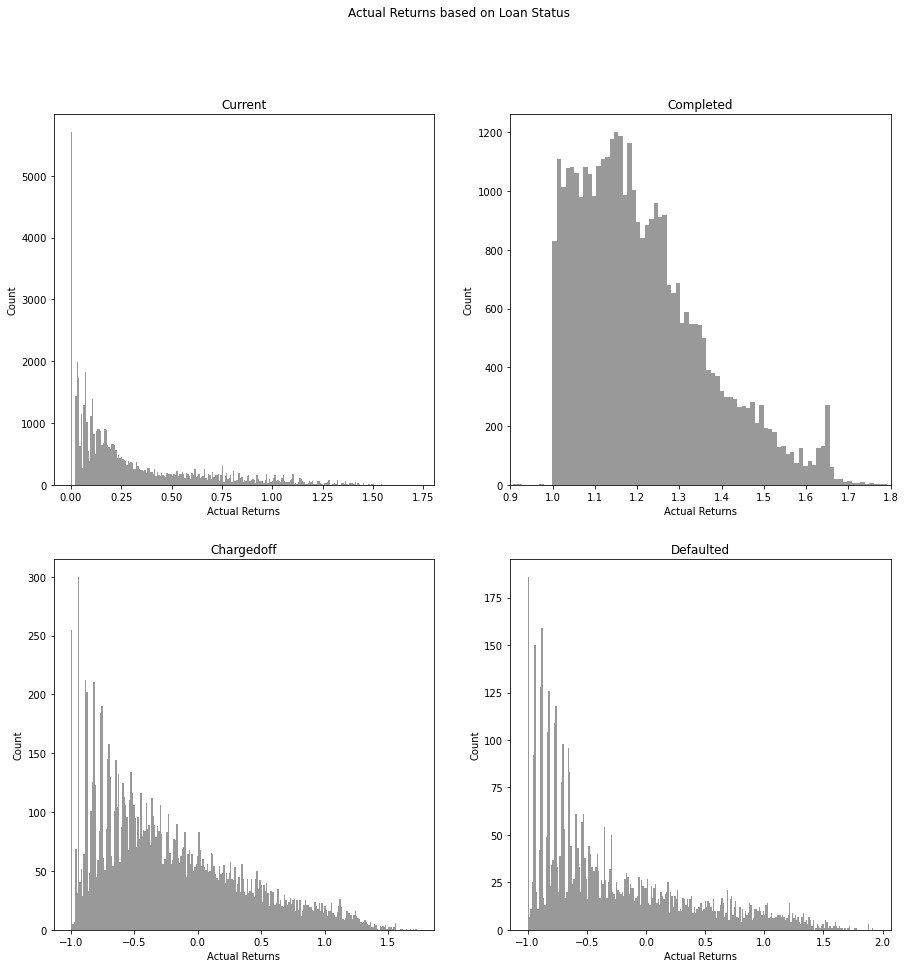

In [22]:
# multiplot for loan status

variables = ['Current', 'Completed', 'Chargedoff', 'Defaulted']

plt.figure(figsize = [15, 15])

# looping through variables list
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    
    sns.distplot(loan.query('LoanStatus == "{}"'.format(variables[i])).ActualReturns, 
                 kde = False, bins = 250, color = 'black')
    
    plt.xlabel('Actual Returns')
    plt.ylabel('Count')
    plt.title(variables[i])
    
plt.subplot(2, 2, 2)
plt.xlim(.9, 1.8)

plt.suptitle('Actual Returns based on Loan Status');

**Current loans**: Most of the current loans seem to have made no returns. They mostly fall within the 0% rate meaning that the borrowers are yet to fully repay the interest on their loans. We can assume that this happened because most of these loans are currently running and might have to compute the actual returns on these loans so far to get real insight into the actual returns for cureent loans.

**Completed loans**: Most of the borrowers who have completed their loans seem to have paid off the full original amount of the loan along with the resulting interests. The majority of actual returns on this loan status was at 125% meaning that the investors made a 25% profit on these loans. Some loans also yielded as much as 178% actual returns.

To see if our assumption is reasonable, we can run a quick amortization on Bankrate. The result is that if a borrower has a loan of USD 10,000 over a 5 year term at a 25% interest rate, they would have paid back a total of \$\17,610.79 as principal and interest. If we went ahead to divide the this amount by the original loan amount of USD 10,000, we would get an actual return of approximately 176 percent. With this, we have some form of confidence that our calculated actual return using the formular we derived earlier is not out of range.

**Chargedoff and defaulted loans**: From the plots for these two loan statuses, we can see that they both yield negative returns. This means that borrowers in this category either did not pay back the full amount they originally borrowed or they did not make any repayment at all. Although the borrowers in this category seem few, any investor will take this into consideration when making any investment decision as this will mean a certain level of loss to be incurred. The investment may still be worth it if the returns on completed and current loans far outweighs that from chargedoff and defaulted loans.

**5. Prosper Rating (Alpha)/Credit Grade**

Let's now explore and see if we'll have a distribution similar to what we have ablove for the borrower's prosperRating (Alpha)/CreditGrade. CreditGrade was used to rate borrowers on the Prosper platform before they changed to ProsperRating after 2009 and we'd need to merge both variables into one before using them in our exploration.

In [23]:
#checking the description of our ProsperRating (Alpha) variable

loan['ProsperRating (Alpha)'].describe()

count     84853
unique        7
top           C
freq      18345
Name: ProsperRating (Alpha), dtype: object

In [24]:
#checking the number of values of each observation in our ProsperRating (Alpha) variable

loan['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

Let's do the same for the CreditGrade variable.

In [25]:
#checking the description of our CreditGrade variable

loan['CreditGrade'].describe()

count     28953
unique        8
top           C
freq       5649
Name: CreditGrade, dtype: object

In [26]:
#checking the number of values of each observation in our CreditGrade variable

loan['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

For the purpose of this exploration, we'll replace the No Credit (NC) values in the Credit Grade column with High Risk (HR). We'll also combine this two columns into one and give it a new name as stated earlier.

In [27]:
# Replacing No Credit (NC) with High Risk (HR)
loan['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# filling NAN values with empty strings
loan['ProsperRating (Alpha)'].fillna("", inplace = True)
loan['CreditGrade'].fillna("", inplace = True)

In [28]:
# combining credit ratings with prosper rating
loan['ProsperRatingCombined'] = loan['ProsperRating (Alpha)'] + loan['CreditGrade']

# dropping rows without any credit rating
loan = loan.query(' ProsperRatingCombined != ""')

In [29]:
# checking our prosper rating combined value counts
loan['ProsperRatingCombined'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     16733
AA     8881
HR     6935
Name: ProsperRatingCombined, dtype: int64

There might be an issue where two (2) 'A' ratings combine to make an 'AA' rating. We'd need to check the number of values before the merge and values after to be sure we did not create any 'AA' rating by ourselves.

In [30]:
# are the number of A and AA ratings the same before and after combining the columns?
(loan['ProsperRatingCombined'] == 'A').sum() == (loan.CreditGrade == 'A').sum() + (loan['ProsperRating (Alpha)'] == 'A').sum() and \
(loan['ProsperRatingCombined'] == 'AA').sum() == (loan.CreditGrade == 'AA').sum() + (loan['ProsperRating (Alpha)'] == 'AA').sum()

True

It's nice to see that we didn't introduce any erroneous data since there were no rows with an 'A' rating for both their Credit Grade and Prosper Rating.

Now we can proceed with plotting.

In [31]:
# convert string to ordinal category type

ProsperRatingCombined_cat = ['HR','E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRatingCombined_cat)
loan['ProsperRatingCombined'] = loan['ProsperRatingCombined'].astype(ordered_var)

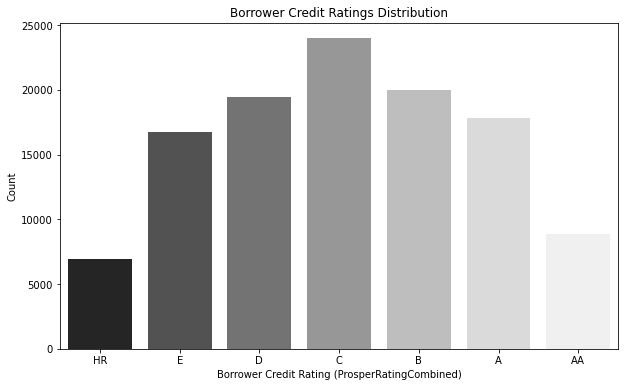

In [32]:
plt.figure(figsize = [10, 6])
sns.countplot(data = loan, x = 'ProsperRatingCombined', palette = "Greys_r")
plt.xlabel('Borrower Credit Rating (ProsperRatingCombined)')
plt.ylabel('Count')
plt.title('Borrower Credit Ratings Distribution');

The above distribution has a positive (right) skew similar to what we had in our Estimated returns plot. This seems to suggest that each credit rating might have several estimated returns. Most borrowers have a credit rating of C.

Before a borrower is assigned any specific rating, several features are taken into consideration. Some of those features that we'll be exploring are Income Range, Debt to Income Ratio. Let's explore the Income Ranges feature to see what conclusions we can draw from it.

**6. Income Range**

In [33]:
loan.IncomeRange.value_counts()

$25,000-49,999    32152
$50,000-74,999    31005
$100,000+         17321
$75,000-99,999    16899
Not displayed      7741
$1-24,999          7261
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

We'll be combining the "Not employed", "Not displayed", with $0 categories since we can assume that they mean the same thing.

In [34]:
#Combining not employed, not displayed and $0 into one category
loan['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [35]:
# creating ordinal categories for income
ord_rating = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ord_rating)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered_var)

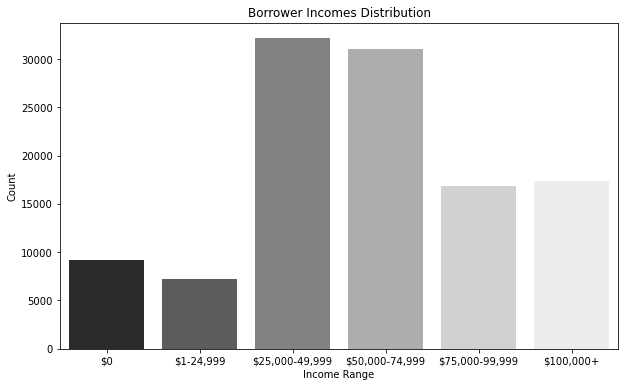

In [36]:
# bar chart
plt.figure(figsize = [10, 6])
sns.countplot(data = loan, x = 'IncomeRange', palette = "Greys_r")
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Borrower Incomes Distribution');

Surprisingly, people with incomes between USD 25,000-49,999 borrowed the most closely followed by those within the USD 50,000-74,999 income range. I would have thought that people with the least income between $0 and USD 24,999 would take more loans to meet their daily needs. But it looks like they had the least borrowings. 

**7. Debt to Income Ratio**

Income range is not the only determinant for credit rating on Prosper. Debt to Income ratio is also a determinant. No investor wants to give out loans to someone who has already taken too much loans and is just taking more to repay the others. Basically, people who are financing old loans with new loans. Investors want to be sure that the only lend to people who's income (after settling other debts) would be enough to cover the new loan they're taking.

In [37]:
loan.DebtToIncomeRatio.describe()

count    105263.000000
mean          0.275976
std           0.551811
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

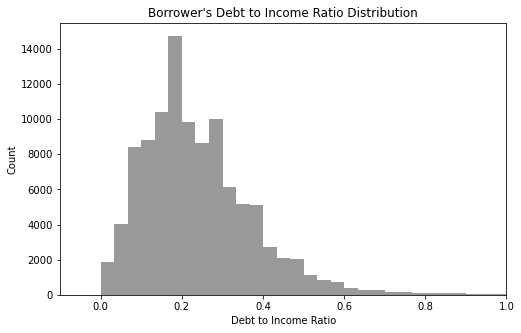

In [45]:
# distribution plot
plt.figure(figsize = [8,5])
sns.distplot(loan.DebtToIncomeRatio, kde = False, bins = 300, color = 'black')
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title("Borrower's Debt to Income Ratio Distribution");

From our plot, we can see that the majority of borrowers are able to finance their loans using just about 20% of their monthly incomes. There are also borrowers who would need to expend up to 90% of their incomes to finance their loans. An investor would be likely to lend more to those who can finance their loans with 50% or less of their monthly income than they would lend to those who need above this percentage of income to repay their debt.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
We explored the borrower APR, original loan amount, income range, debt to income ratios, credit ratings, estimated returns and actual returns variables of the dataset to determine the effect they have on loan performance.

We combined the Credit Grades variable with Prosper Rating since they both referred to the same thing and there were too many missing values in each. We also combined "Not Employed" and "Not Displayed" with $\0 for the same reason. Another tidying we did was to combine the "High Risk (HR)" and "No Credit (NC)" categories.

One would expect that borrowers in the lower income range would take mor loans than others but from our exploration, we found that borrowers within the USD 25-000-49,999, USD 50,000-74,999 and $100,000+ income ranges took more loans than any other income group.

Additionally, after we simplified our actual returns variable and explored it, we found that there was a large variation between the different loan statuses.

## Bivariate Exploration


First, let's look at the pairwise correlation between the numeric features that we are interested in and find out the relationship that exists amongst them.

**8. Relationship between Estimated Returns, Actual Returns, and Debt to Income Ratios**

In [46]:
# numeric and categorical variables
numeric_vars = ['DebtToIncomeRatio', 'ActualReturns', 'EstimatedReturn']
categoric_vars = ['IncomeRange', 'ProsperRatingCombined']

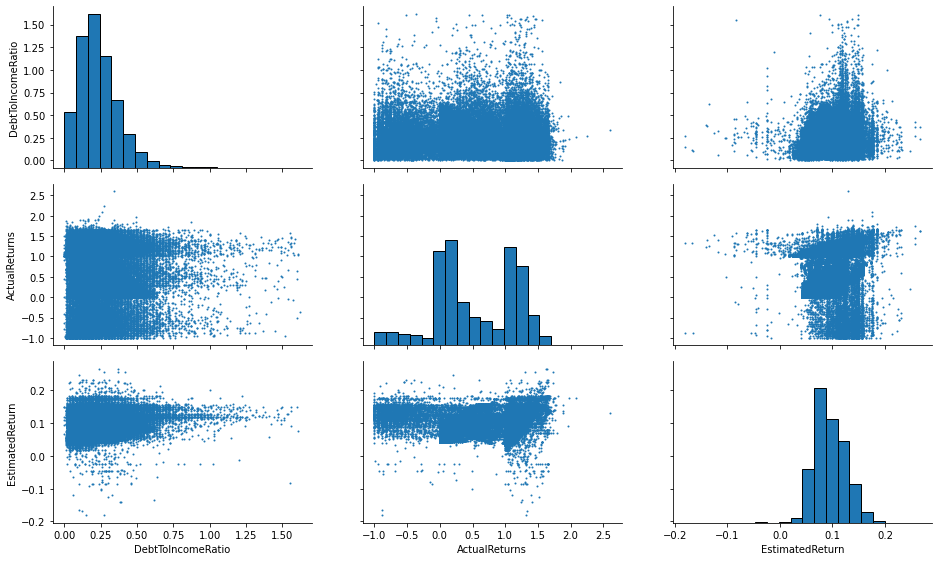

In [65]:
# plot matrix excluding the top 0.5% of debt to income ratios

g = sns.PairGrid(data = loan.query('DebtToIncomeRatio<DebtToIncomeRatio.quantile(0.995)'),
                                   vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20, edgecolor='black')

g.map_offdiag(plt.scatter, s = 1);
                 
## set plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14,8);

From our univariate exploration, we have a good undertanding about the range of values we can expect. By limiting the axis values, we are able to prevent outliers from skewing the plot. Otherwise, most of the points will appear to be grouped in a vertical line.

Surprisingly, it doesn't look like there's any relationship between the estimated returns and the actual returns we calculated. We may have to investigate further by querying some specific categories of loan status.

There is also no relationship between any of the other numeric variables as well.

One might expect borrowers with a high debt to income ratio to have higher risk and lower returns but that doesn't seem to be the case here.

**9. Estimated Returns by Income Range and Credit Ratings**

Now, let's take a look at the effect a borrower's income and credit rating has on the estimated returns of investors.

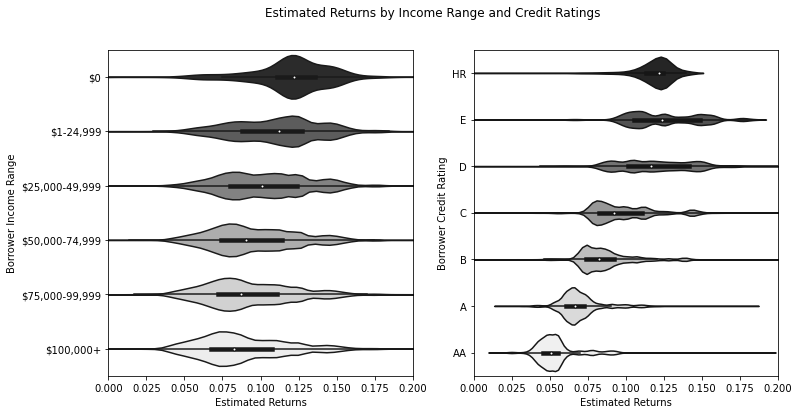

In [66]:
# Violin plots
plt.figure(figsize = [12, 6])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'IncomeRange', x = 'EstimatedReturn', palette = "Greys_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Income Range')
plt.xlabel('Estimated Returns')

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'ProsperRatingCombined', x = 'EstimatedReturn', palette = "Greys_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Credit Rating')
plt.xlabel('Estimated Returns')

plt.suptitle('Estimated Returns by Income Range and Credit Ratings');

From the above violin plots, we can see that as the borrower's income rises, the median estimated return falls. The credit rating violin plot makes this a lot more visible. As a borrower's credit rating increases, the median estimated return decreases greatly.

We can assume that as income increases, the ability to repay the loan also increases, so to adjust for the higher risk, the interest rate for the loan also increases.

Also, creditors typically compete for these high income borrowers which drive the highest credit rating interest rates down.

It's exciting to see that the width of the violin plot shrinks as credit rating increases. This suggests that the expected returns for this feature is much more predictable in comparison with the lower credit ratings.

Let's plot for the actual returns.

**10. Actual Returns by Income Range and Credit Ratings**

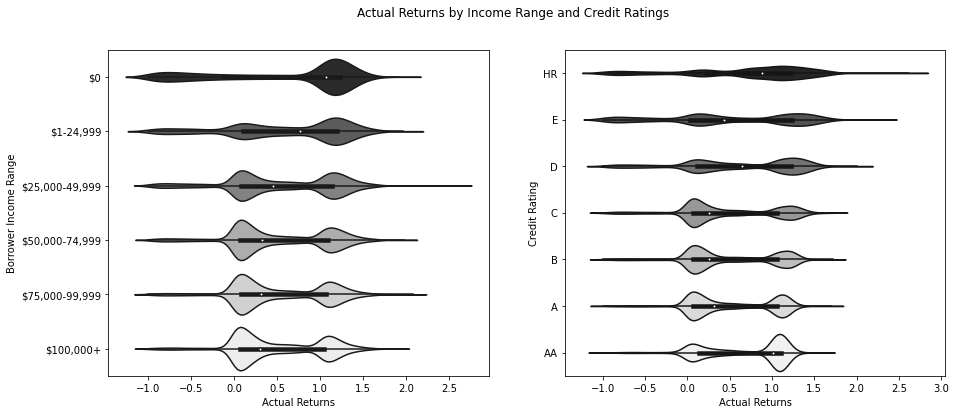

In [67]:
# line plots for income range and credit rating
plt.figure(figsize = [15, 6])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'IncomeRange', x = 'ActualReturns', palette = "Greys_r", showfliers = False)

plt.ylabel('Borrower Income Range')
plt.xlabel('Actual Returns')


plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'ProsperRatingCombined', x = 'ActualReturns', palette = "Greys_r", showfliers = False)

plt.ylabel('Credit Rating')
plt.xlabel('Actual Returns')

plt.suptitle('Actual Returns by Income Range and Credit Ratings');

This violin plot suggests that investing in borrowers with no reported income and the highest credit ratings will produce the highest returns.

As mentioned earlier, we might have to do a lot more exploration to either group by loan status or try to modify our feature calculation.

We'll now proceed with plotting the relationship between for credit rating and income range.

**11. Correlation between borrower income and their credit rating**

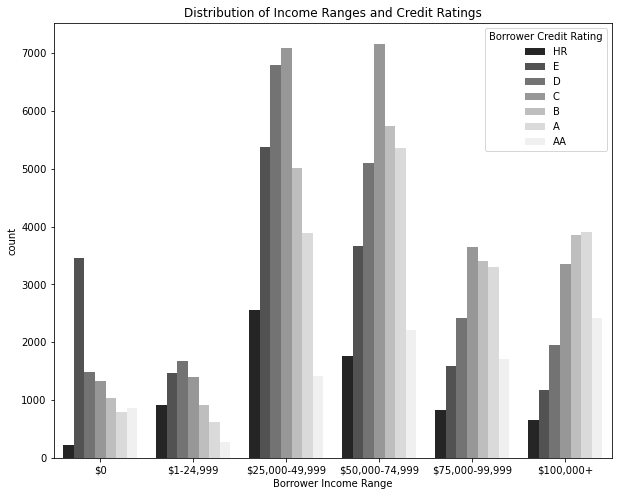

In [68]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sns.countplot(data = loan, x = 'IncomeRange', hue = 'ProsperRatingCombined',
                   palette = 'Greys_r')

ax.legend(title = 'Borrower Credit Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.xlabel('Borrower Income Range');

From the above clustered bar chart, we can see that there's a relationship between borrower incomes and credit rating. As a borrower's income increases with increase in credit rating, the borrower is able to loans with lower interest rates. However, borrowers with incomes from $\75,000 and above are not automatically guaranteed the best credit ratings. It would be interesting to see what other variables determine a borrower's credit rating.

It also looks like we have a large amount of "AA" credit ratings amongs borrowers within the $0 income range. We can assume that one must have other significant assets to use as collaterals or a great loan history with the Prosper platform to be able to receive the highest credit rating without any income.

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
From our matrix plot, our numerical features of interest showed that there was no relationship between any of the variables. This was surprising as I had expected to see a correlation between debt to income ratios, estimated returns, and actual returns.

Our violin plots showed that median estimated returns decreased as the borrowers income range increased. This makes sense as borrowers who have higher incomes would be able to get the most competetive rates from investors. The trend between lower estimated returns and higher credit ratings was much more apparent with narrowing quartiles and lower medians.

The violin plot for the actual returns showed that we would need to do some modifications or grouping to enable us get any insight from the exploration.

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Our clustered bar chart looked at credit ratings and income ranges which showed the same trend of higher borrower income equating to higher credit ratings that we got earlier. But there were some cases where a high number of borrowers with no income were given the highest credit ratings "AA". We also observed that borrowers with incomes of greater than $\75,000 may still be considered "High Risk" borrowers.

## Multivariate Exploration
The major thing I would like to explore in this exploration section is the relationship between income ranges, credit scores, and estimated returns. I also want to explore the effect of Prosper rating and Term on the relationship between borrower APR and loan original amount.

**12. Effect of Credit rating on Income range and Estimated return** 

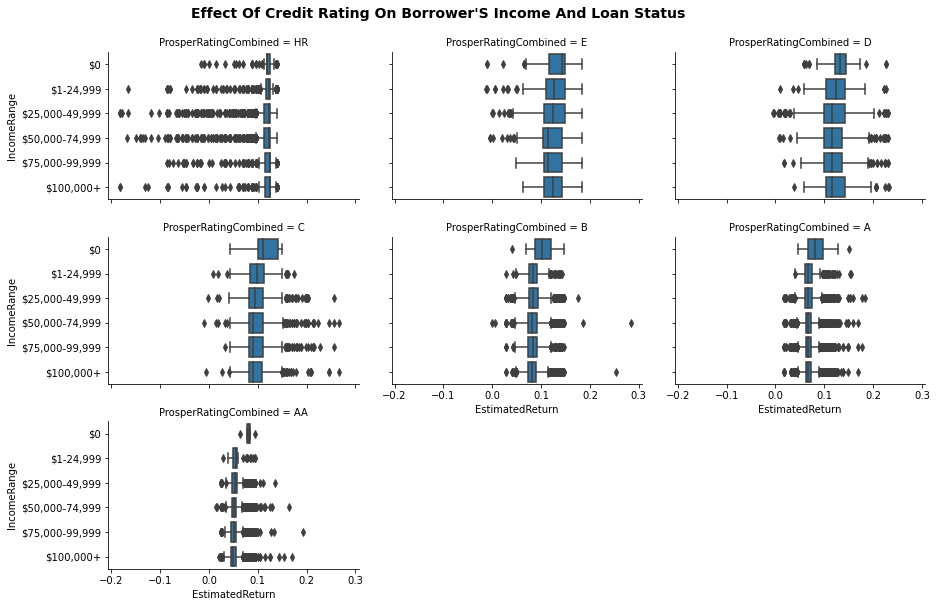

In [82]:
# create a Pair grid of estimated returns

g = sns.FacetGrid(data = loan, col = 'ProsperRatingCombined', size = 3, margin_titles = True, col_wrap = 3)
g.map(sns.boxplot, 'EstimatedReturn', 'IncomeRange');

plt.suptitle("Effect of Credit Rating on Borrower's Income and Loan Status".title(),
            fontsize=14, weight='bold', y= 1.04)
# set plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14,8);

From the FacetGrid above, we continue to see that as the credit ratings and incomes reduce, the estimated returns on loans increases. It's great to see that the income range of a borrower does not have much effect on the estimated returns by credit rating category.

For credit ratings 'AA', 'A', 'B', and 'HR', we don't see any difference in the rate of return for income ranges USD 1-100k+. But, there is an increase in returns for the $\0 income range across all the credit rating categories.

For credit ratings 'C', 'D', and 'E', we can see some difference but the median return is still within +-1% (except the $0 category).

Credit ratings seems to be a better determinant of estimated returns.

Next, let's find out the effect actual returns, estimated returns has on credit ratings and loan status.

**13. The effect of actual returns, estimated returns on credit ratings and loan status.**

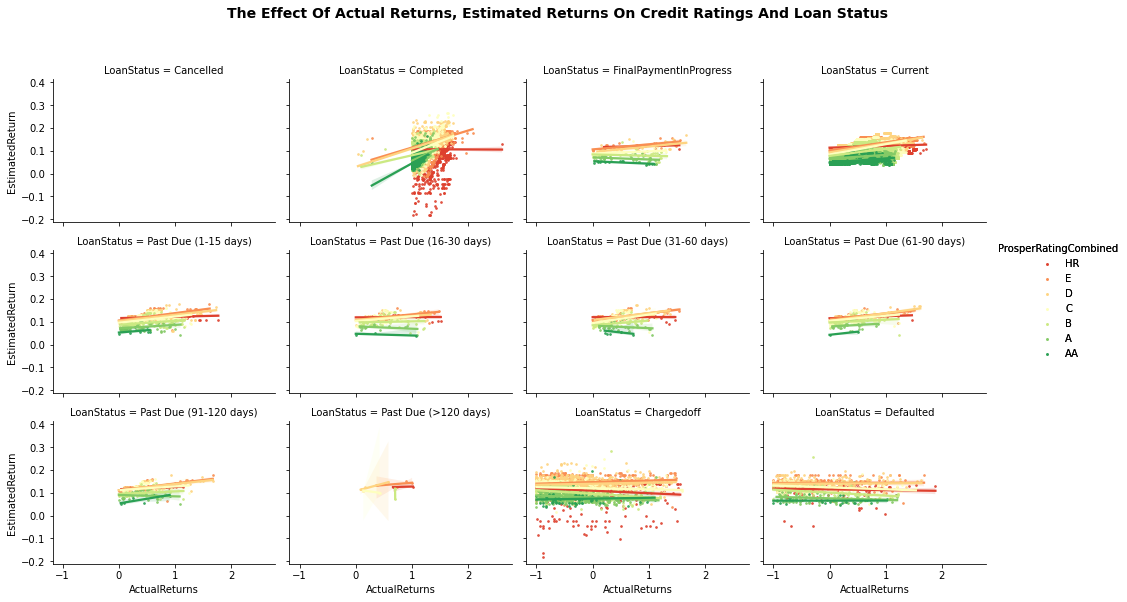

In [81]:
status_order = ['Cancelled', 'Completed','FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)',
                'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
                'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted']

# plot matrix of actual returns and estimated returns by credit ratings and loan status

g = sns.lmplot(x='ActualReturns', y= 'EstimatedReturn', data=loan,
               palette='RdYlGn', scatter_kws={'s':3}, hue = 'ProsperRatingCombined', 
               col = 'LoanStatus', col_wrap = 4, col_order = status_order);
plt.suptitle('The effect of actual returns, estimated returns on credit ratings and loan status'.title(),
            fontsize=14, weight='bold', y= 1.04)
## set plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14,8)

#optimise distance between plots
plt.tight_layout()
g.add_legend();

We'll limit our explanation to four loan statuses: Current, Completed, Defaulted, and Chargedoff to save time.

Observations from the above plot:

**Defaulted Loans**: From the plots above, there's no relationship between estimated returns and the calculated actual return of the loans.

**Chargedoff loans:** There's also no relationship between estimated returns and actual returns for this set of loans across all credit ratings and income ranges. 

**Current Loans:** We can see a slightly linear relationship between the estimated returns and actual returns. This means that if the estimated return on a loan increases, there's a small chance that the actual return on the loan will also increase and vice versa.

**Completed Loans**: For this set of loans, we can see that there is an obvious linear relationship between estimated returns and actual returns. What this means is that regardless of the return that was estimated for a particular loan, there's a possibility that the loan will always be fully paid. The reason for this might be because some borrowers repay their loans early before the due date of the loans. Hence, reducing the amount of interest they pay on their loans.

**14. Effect of loan term on the relationship between Borrower APR and loan amount**


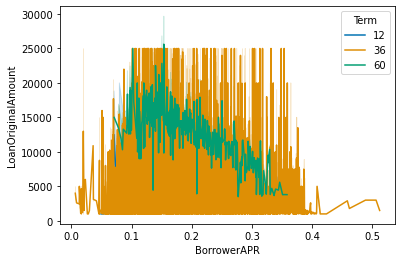

In [77]:
#Effect of term on the relationship between APR and loan amount
sns.lineplot(x="BorrowerAPR", y='LoanOriginalAmount', data=loan, palette='colorblind', hue='Term');

The term of a loan does not appear to affect the amount of loan a borrower can get neither does it determine the interest rate charged on loans on the Prosper loan platform.

**15. Effect of Prosper rating on Borrower APR and loan amount**


In [78]:
#correlation between Borrower APR and Original Loan Amount
loan[['BorrowerAPR', 'LoanOriginalAmount']].corr()

,BorrowerAPR,LoanOriginalAmount
BorrowerAPR,1.000000,-0.323532
LoanOriginalAmount,-0.323532,1.000000


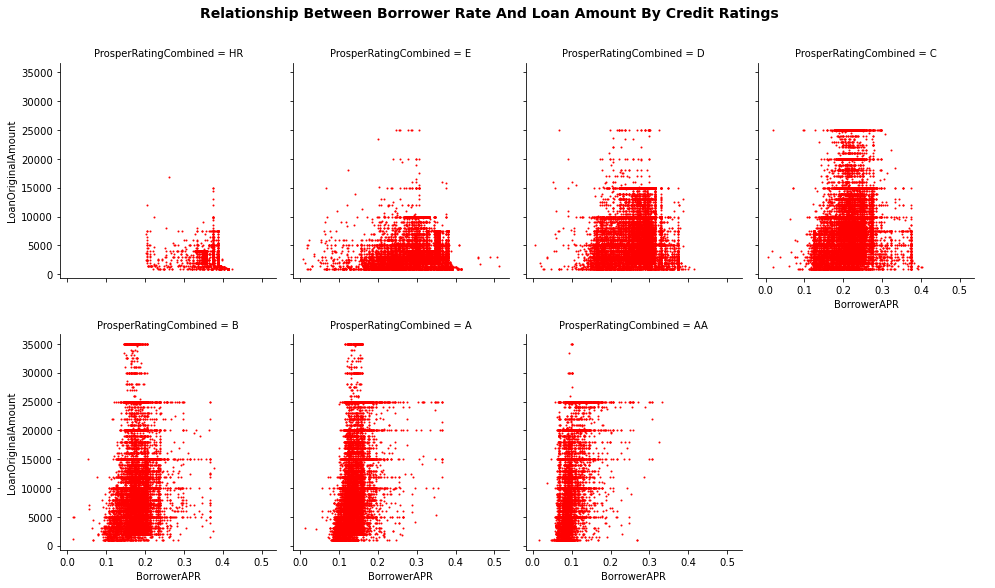

In [80]:
s

From the above scatter plot, we can see that a borrower can access higher loan amounts if their prosper rating increases. This means that there's a positive relationship between loan amount and Prosper rating — the higher the prosper rating, the higher the loan amount. This is not the same for borrower APR and Prosper rating as the borrower APR decreases with increase in prosper rating. Hence, there's a negative relationship between borrower APR and Prosper rating.

Surprisingly, there's a slightly positive relationship between borrower APR and loan amount when the Prosper ratings increased from E to AA. This may be because people with higher ratings tend to borrow more money. If APR is increased for this set of borrowers, they'd be discouraged from borrowing more money. But people with lower credit ratings are suceptible to borrowing less money. If the APR for this set of people is reduced, they'd be encouraged to borrow a lot more.